In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dont-overfit-ii/sample_submission.csv
/kaggle/input/dont-overfit-ii/train.csv
/kaggle/input/dont-overfit-ii/test.csv
/kaggle/input/dont-overfit-i/sample_submission.csv
/kaggle/input/dont-overfit-i/train.csv
/kaggle/input/dont-overfit-i/test.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv('/kaggle/input/dont-overfit-i/train.csv')
test = pd.read_csv('/kaggle/input/dont-overfit-i/test.csv')
submission=pd.read_csv('/kaggle/input/dont-overfit-i/sample_submission.csv')

# train.shape, test.shape, submission.shape

y=train['target']
X=train.drop(["id", "target"], axis=1)
test = test.drop(["id"], axis=1)

# 1. Data Cleaning & Preparation

In [4]:
train.head()

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
0,0,1.0,-0.098,2.165,0.681,-0.614,1.309,-0.455,-0.236,0.276,...,0.867,1.347,0.504,-0.649,0.672,-2.097,1.051,-0.414,1.038,-1.065
1,1,0.0,1.081,-0.973,-0.383,0.326,-0.428,0.317,1.172,0.352,...,-0.165,-1.695,-1.257,1.359,-0.808,-1.624,-0.458,-1.099,-0.936,0.973
2,2,1.0,-0.523,-0.089,-0.348,0.148,-0.022,0.404,-0.023,-0.172,...,0.013,0.263,-1.222,0.726,1.444,-1.165,-1.544,0.004,0.800,-1.211
3,3,1.0,0.067,-0.021,0.392,-1.637,-0.446,-0.725,-1.035,0.834,...,-0.404,0.640,-0.595,-0.966,0.900,0.467,-0.562,-0.254,-0.533,0.238
4,4,1.0,2.347,-0.831,0.511,-0.021,1.225,1.594,0.585,1.509,...,0.898,0.134,2.415,-0.996,-1.006,1.378,1.246,1.478,0.428,0.253


In [5]:
test.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.500,-1.033,-1.595,0.309,-0.714,0.502,0.535,-0.129,-0.687,1.291,...,-0.088,-2.628,-0.845,2.078,-0.277,2.132,0.609,-0.104,0.312,0.979
1,0.776,0.914,-0.494,1.347,-0.867,0.480,0.578,-0.313,0.203,1.356,...,-0.683,-0.066,0.025,0.606,-0.353,-1.133,-3.138,0.281,-0.625,-0.761
2,1.750,0.509,-0.057,0.835,-0.476,1.428,-0.701,-2.009,-1.378,0.167,...,-0.094,0.351,-0.607,-0.737,-0.031,0.701,0.976,0.135,-1.327,2.463
3,-0.556,-1.855,-0.682,0.578,1.592,0.512,-1.419,0.722,0.511,0.567,...,-0.336,-0.787,0.255,-0.031,-0.836,0.916,2.411,1.053,-1.601,-1.529
4,0.754,-0.245,1.173,-1.623,0.009,0.370,0.781,-1.763,-1.432,-0.930,...,2.184,-1.090,0.216,1.186,-0.143,0.322,-0.068,-0.156,-1.153,0.825


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Columns: 302 entries, id to 299
dtypes: float64(301), int64(1)
memory usage: 590.0 KB


In [7]:
train.isnull().any().any()

False

In [8]:
train.duplicated().sum()

0

In [9]:
train.describe()

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,...,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,124.500000,0.640000,0.023292,-0.026872,0.167404,0.001904,0.001588,-0.007304,0.032052,0.078412,...,0.044652,0.126344,0.018436,-0.012092,-0.065720,-0.106112,0.046472,0.006452,0.009372,-0.128952
std,72.312977,0.480963,0.998354,1.009314,1.021709,1.011751,1.035411,0.955700,1.006657,0.939731,...,1.011416,0.972567,0.954229,0.960630,1.057414,1.038389,0.967661,0.998984,1.008099,0.971219
min,0.000000,0.000000,-2.319000,-2.931000,-2.477000,-2.359000,-2.566000,-2.845000,-2.976000,-3.444000,...,-2.804000,-2.443000,-2.757000,-2.466000,-3.287000,-3.072000,-2.634000,-2.776000,-3.211000,-3.500000
25%,62.250000,0.000000,-0.644750,-0.739750,-0.425250,-0.686500,-0.659000,-0.643750,-0.675000,-0.550750,...,-0.617000,-0.510500,-0.535750,-0.657000,-0.818500,-0.821000,-0.605500,-0.751250,-0.550000,-0.754250
50%,124.500000,1.000000,-0.015500,0.057000,0.184000,-0.016500,-0.023000,0.037500,0.060500,0.183500,...,0.067500,0.091000,0.057500,-0.021000,-0.009000,-0.079500,0.009500,0.005500,-0.009000,-0.132500
75%,186.750000,1.000000,0.677000,0.620750,0.805000,0.720000,0.735000,0.660500,0.783250,0.766250,...,0.797250,0.804250,0.631500,0.650250,0.739500,0.493000,0.683000,0.794250,0.654250,0.503250
max,249.000000,1.000000,2.567000,2.419000,3.392000,2.771000,2.901000,2.793000,2.546000,2.846000,...,2.865000,2.801000,2.736000,2.596000,2.226000,3.131000,3.236000,2.626000,3.530000,2.771000


In [10]:
train['target'].value_counts()

target
1.0    160
0.0     90
Name: count, dtype: int64

## 1.1 Statistics Analysis

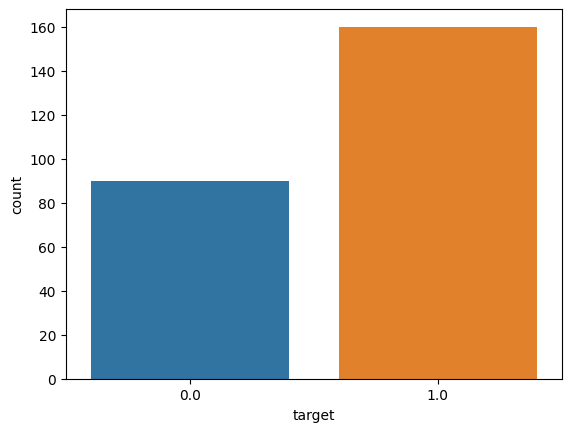

In [11]:
p = sns.countplot(data=train, x="target")
plt.show()

### Balance the dataset with synthetic samples using SMOTE
reference: https://www.kaggle.com/code/rafjaa/resampling-strategies-for-imbalanced-datasets

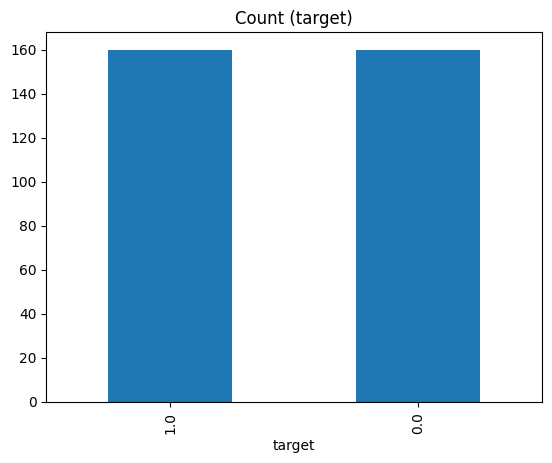

In [12]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority', n_jobs=-1)
X_sm, y_sm = smote.fit_resample(X, train['target'])

df = pd.DataFrame(X_sm)
df['target'] = y_sm

df['target'].value_counts().plot(kind='bar', title='Count (target)');

Text(0, 0.5, 'Frequency')

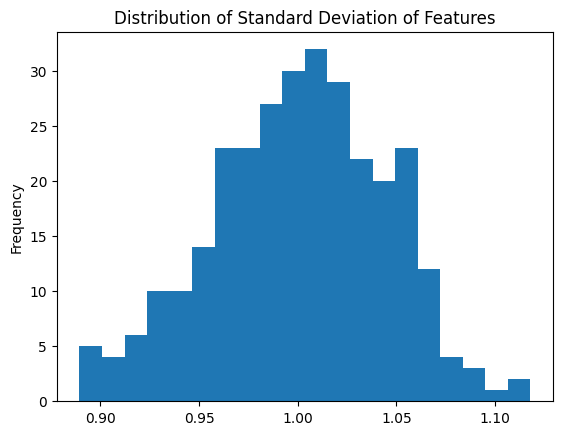

In [13]:
std_values = train[train.columns[2:]].std()
plt.hist(std_values, bins=20)
plt.title('Distribution of Standard Deviation of Features')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

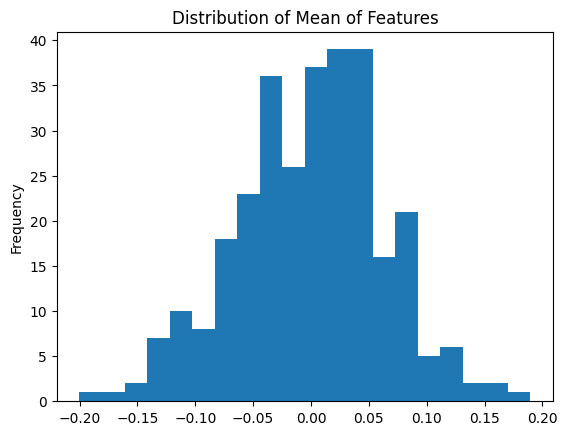

In [14]:
mean_values = train[train.columns[2:]].mean()
plt.hist(mean_values, bins=20)
plt.title('Distribution of Mean of Features')
plt.ylabel('Frequency')

Distributions of random 28 columns


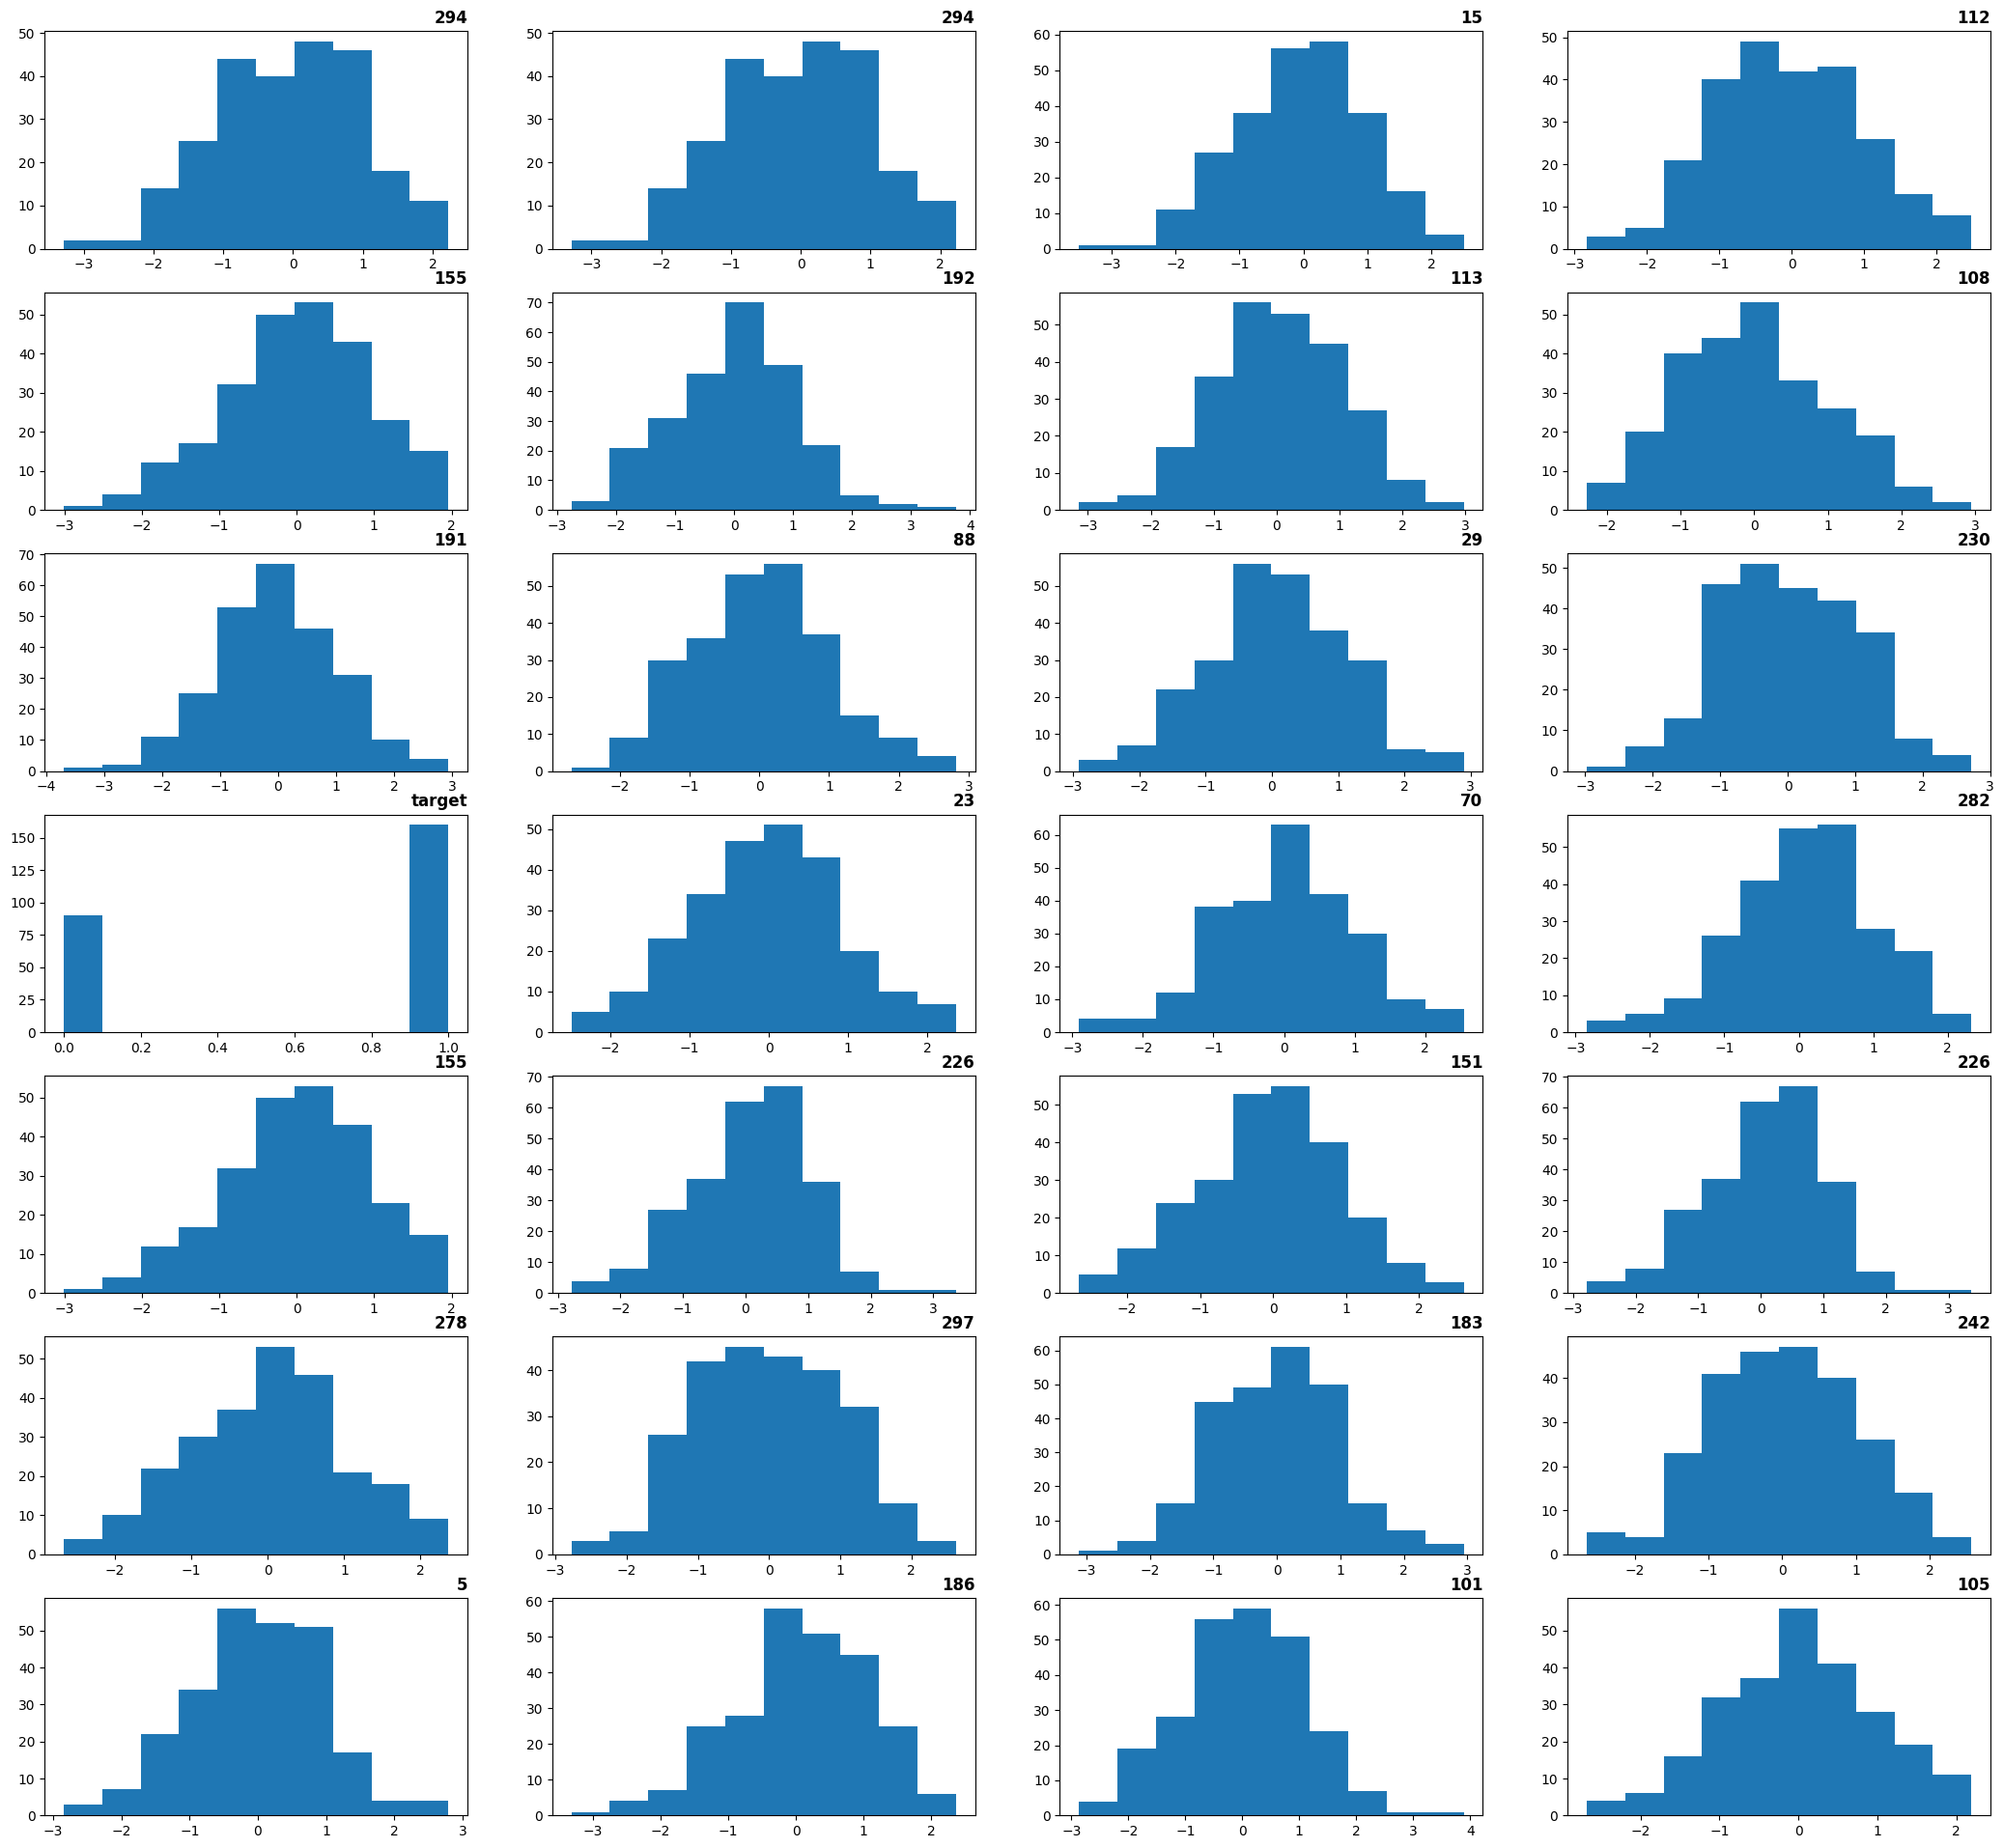

In [15]:
print('Distributions of random 28 columns')
plt.figure(figsize=(26, 24))

random_col = np.random.choice(list(train.columns), 28)

for i, col in enumerate(random_col):
    plt.subplot(7, 4, i + 1)
    plt.hist(train[col])
    plt.title(col, loc='right', fontsize=12, fontweight='bold')

## 1.2 feature Analysis

In [16]:
train_temp = train.drop(['id'], axis=1)
train_temp.corr()

,target,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
target,1.000000,0.108966,-0.073319,-0.015141,0.011549,-0.114726,-0.050329,-0.057063,0.004239,-0.048443,...,0.039675,0.055694,-0.088930,-0.034363,-0.031964,-0.170501,0.007434,0.056810,-0.134760,-0.075475
0,0.108966,1.000000,-0.003871,-0.010487,-0.047819,0.013967,0.070091,-0.022537,0.002832,-0.060031,...,-0.023230,0.053416,-0.143668,-0.007530,-0.060824,-0.024839,-0.051288,0.029143,0.065951,0.038523
1,-0.073319,-0.003871,1.000000,0.013573,-0.018884,0.086743,-0.028023,-0.032914,-0.066416,-0.027201,...,-0.006300,-0.077365,-0.021583,-0.054171,-0.046174,0.042820,-0.127499,0.065883,0.055470,-0.056612
2,-0.015141,-0.010487,0.013573,1.000000,-0.031620,0.088980,-0.050191,0.024674,0.035260,-0.000094,...,-0.111172,-0.027842,-0.013653,-0.009691,-0.051292,-0.028690,-0.071835,0.069395,0.083946,0.025507
3,0.011549,-0.047819,-0.018884,-0.031620,1.000000,0.025255,0.172058,0.157954,-0.018158,0.058736,...,-0.114505,0.029415,0.129069,0.096159,-0.027793,-0.005016,0.034551,0.089963,-0.066438,-0.010770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,-0.170501,-0.024839,0.042820,-0.028690,-0.005016,-0.050318,0.026868,-0.023192,0.032648,0.017297,...,-0.030738,-0.020251,0.015083,-0.139025,-0.015920,1.000000,-0.072721,-0.036572,-0.034341,0.097052
296,0.007434,-0.051288,-0.127499,-0.071835,0.034551,-0.030017,0.070294,0.036903,-0.006235,-0.071254,...,0.016047,0.042079,-0.045879,-0.011766,0.125693,-0.072721,1.000000,-0.002007,0.056297,0.040264
297,0.056810,0.029143,0.065883,0.069395,0.089963,0.029747,0.069243,0.037912,0.014628,0.009224,...,0.048496,0.066474,-0.025382,0.021148,-0.103255,-0.036572,-0.002007,1.000000,0.039793,-0.141078
298,-0.134760,0.065951,0.055470,0.083946,-0.066438,-0.008517,-0.048009,0.171640,-0.031094,-0.000516,...,-0.125556,0.087400,0.008096,-0.005422,-0.063242,-0.034341,0.056297,0.039793,1.000000,-0.092017


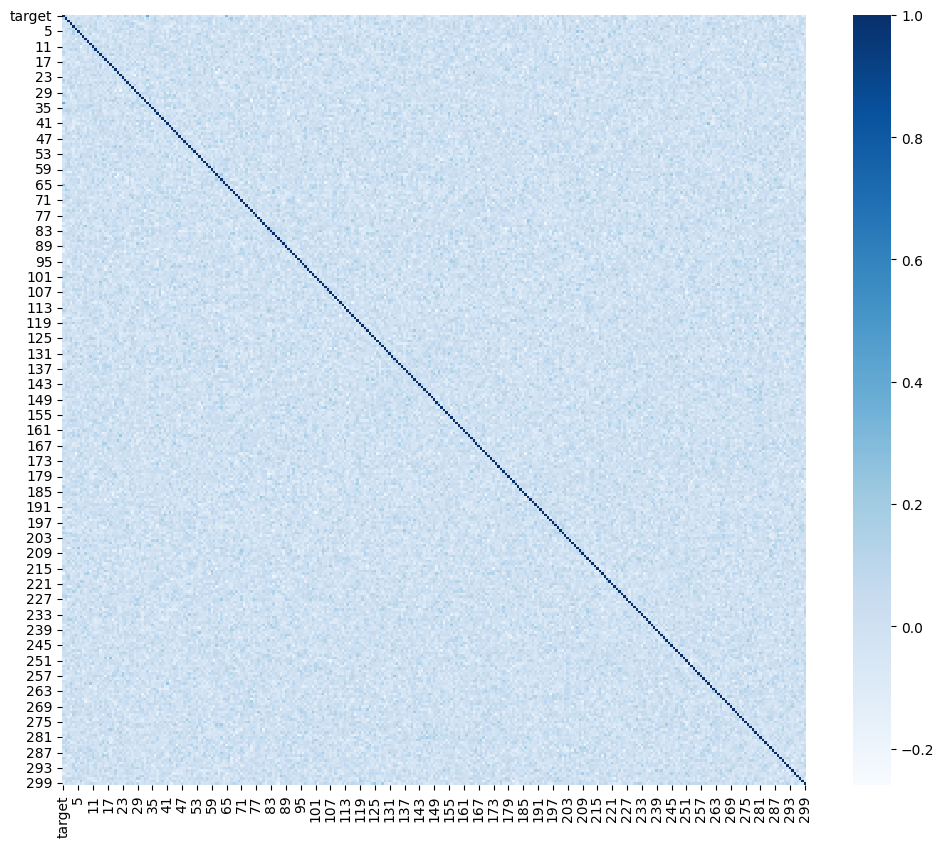

In [17]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(train_temp.corr(), ax=ax,  cmap='Blues')
plt.show()

In [18]:
# extract important feature from correlation
corr_matrix = train_temp.corr()
target_corr = corr_matrix['target'].abs().sort_values(ascending=False)
top_10_features = target_corr.head(11).index
top_corr_matrix = train_temp[top_10_features].corr()
top_corr_matrix

,target,33,65,217,117,91,24,295,73,183,80
target,1.000000,0.373608,0.293846,-0.207215,-0.197496,-0.192536,0.173096,-0.170501,-0.167557,0.164146,-0.162558
33,0.373608,1.000000,0.080415,-0.014277,-0.035177,-0.059426,0.176917,0.035106,-0.032916,0.086041,-0.021728
65,0.293846,0.080415,1.000000,-0.048587,0.049378,-0.041481,0.013329,-0.137809,0.057282,0.077018,-0.087727
217,-0.207215,-0.014277,-0.048587,1.000000,-0.018358,-0.113086,-0.058210,0.076786,0.031125,0.023855,0.059748
117,-0.197496,-0.035177,0.049378,-0.018358,1.000000,-0.010950,-0.159749,0.127442,0.045906,0.013758,0.039128
91,-0.192536,-0.059426,-0.041481,-0.113086,-0.010950,1.000000,-0.198709,-0.031105,-0.031081,-0.081749,0.038138
24,0.173096,0.176917,0.013329,-0.058210,-0.159749,-0.198709,1.000000,0.036107,0.077431,-0.042095,-0.019030
295,-0.170501,0.035106,-0.137809,0.076786,0.127442,-0.031105,0.036107,1.000000,-0.027769,0.043212,-0.002764
73,-0.167557,-0.032916,0.057282,0.031125,0.045906,-0.031081,0.077431,-0.027769,1.000000,-0.090365,0.051460
183,0.164146,0.086041,0.077018,0.023855,0.013758,-0.081749,-0.042095,0.043212,-0.090365,1.000000,0.009057


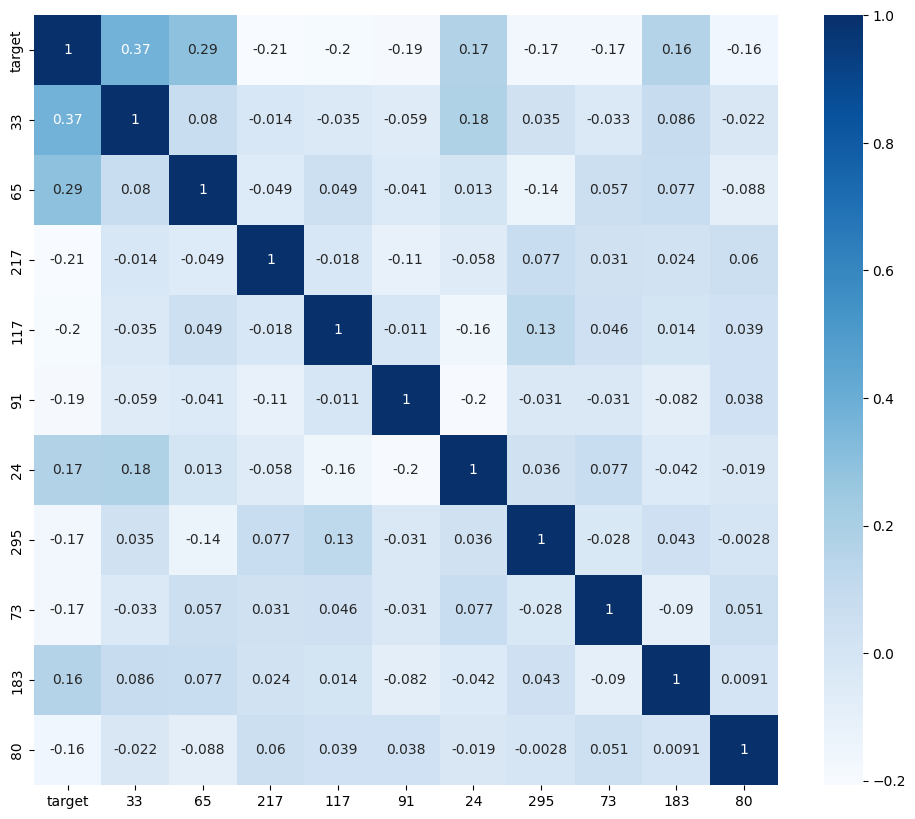

In [19]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(top_corr_matrix, ax=ax, annot=True, cmap='Blues')
plt.show()

In [20]:
train_top10 = train_temp[top_10_features]
train_top10.shape

(250, 11)

# 2. Feature Engineering

In [21]:
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

from imblearn.over_sampling import SMOTE

### 2.1 Creating statistics features: mean+std

In [22]:
# create feature: mean + std
train = pd.read_csv('/kaggle/input/dont-overfit-i/train.csv')
test = pd.read_csv('/kaggle/input/dont-overfit-i/test.csv')

y=train['target']
X=train.drop(["id", "target"], axis=1)
test = test.drop(["id"], axis=1)

X_train = X
X_test = test
y_train = y

In [23]:
X_train.shape, X_test.shape, y_train.shape

((250, 300), (19750, 300), (250,))

### 2.2 Feature Transformation: Standard Scalar

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_scaled = X_scaler
y_train_scaled = y
X_test_scaled = test

In [25]:
X_train.shape, X_test.shape, y_train.shape, X_train_scaled.shape, y_train_scaled.shape,X_test_scaled.shape

((250, 300), (19750, 300), (250,), (250, 300), (250,), (19750, 300))

### 2.3 Feature Selection: Random Forest

In [26]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
# feature_selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42))
# X_train = feature_selector.fit_transform(X_train, y_train)
# X_test = feature_selector.transform(X_test)

# X_train.shape, X_test.shape, y_train.shape

# 3. Training dataset evaluation with different model - AUCROC performance

In [27]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

from sklearn.linear_model import LogisticRegression, Lasso, SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

## 3.1 train multiple models and evaluate them

In [28]:
# Train multiple models and evaluate them
models = {
    'Logistic Regression': LogisticRegression(C=0.1, penalty='l2', class_weight='balanced', random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(C=1.0, kernel='rbf', class_weight='balanced', random_state=42, probability=True),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced', random_state=42),
    'Gaussian NB': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
    'Lasso': Lasso(alpha=0.1, random_state=42),
    'SGDClassifier': SGDClassifier(max_iter=1000, tol=1e-3, class_weight='balanced', random_state=42)
}

kf = KFold(n_splits=20, shuffle=True, random_state=42)

# Store AUC scores for plotting
model_auc_scores = {}
model_roc_curves = {}

for model_name, model in models.items():
    auc_scores = []
    all_fpr = []
    all_tpr = []
    
    for train_index, val_index in kf.split(X_train_scaled):
        # Split the data
        X_kf_train, X_kf_val = X_train_scaled[train_index], X_train_scaled[val_index]
        y_kf_train, y_kf_val = y_train.iloc[train_index], y_train.iloc[val_index]
        
        # Fit the model
        model.fit(X_kf_train, y_kf_train)
        
        # Obtain prediction probabilities
        if hasattr(model, 'predict_proba'):
            y_kf_val_pred_prob = model.predict_proba(X_kf_val)[:, 1]
        elif hasattr(model, 'decision_function'):
            y_kf_val_pred_prob = model.decision_function(X_kf_val)
        else:
            y_kf_val_pred_prob = model.predict(X_kf_val)  # Use predictions directly if no proba or decision function

        # Calculate AUC score
        auc_scores.append(roc_auc_score(y_kf_val, y_kf_val_pred_prob))
        
        # Store FPR and TPR for ROC curve
        fpr, tpr, _ = roc_curve(y_kf_val, y_kf_val_pred_prob)
        all_fpr.append(fpr)
        all_tpr.append(tpr)
    
    # Calculate mean and standard deviation of AUC
    mean_auc = np.mean(auc_scores)
    std_auc = np.std(auc_scores)
    model_auc_scores[model_name] = (mean_auc, std_auc)
    
    # Store average ROC curve data
    model_roc_curves[model_name] = (all_fpr, all_tpr)

    print(f"K-Fold ROC AUC Score ({model_name}): {mean_auc:.4f} (+/- {std_auc:.4f})")

K-Fold ROC AUC Score (Logistic Regression): 0.8010 (+/- 0.1269)
K-Fold ROC AUC Score (Random Forest): 0.7201 (+/- 0.1347)
K-Fold ROC AUC Score (SVM): 0.7616 (+/- 0.1720)
K-Fold ROC AUC Score (KNN): 0.5783 (+/- 0.2084)
K-Fold ROC AUC Score (Decision Tree): 0.5842 (+/- 0.1465)
K-Fold ROC AUC Score (Gaussian NB): 0.7626 (+/- 0.1292)
K-Fold ROC AUC Score (AdaBoost): 0.6996 (+/- 0.1935)
K-Fold ROC AUC Score (Lasso): 0.7882 (+/- 0.1550)
K-Fold ROC AUC Score (SGDClassifier): 0.7440 (+/- 0.1351)


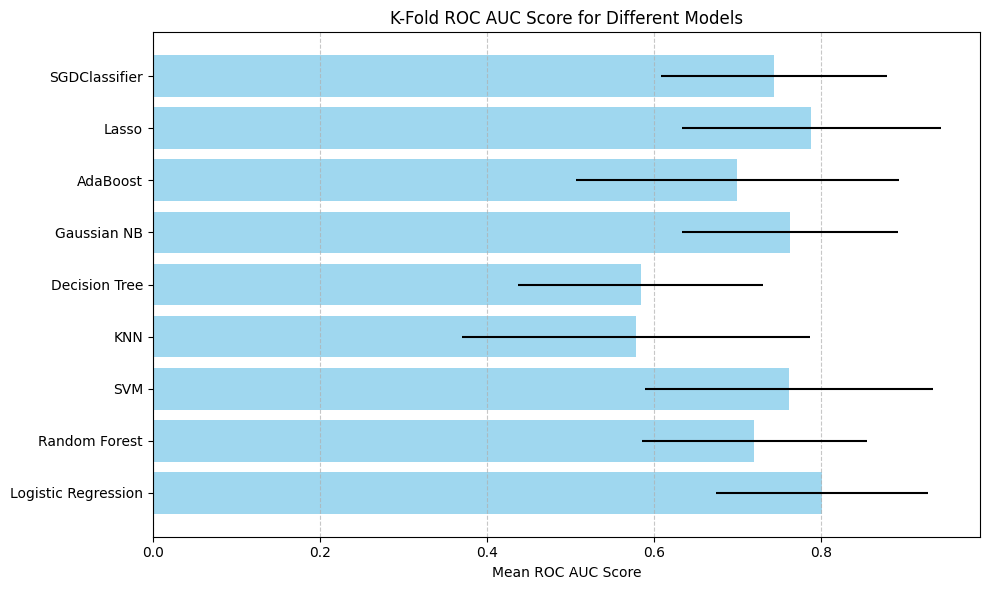

In [29]:
# Plotting K-Fold ROC AUC Scores as a Bar Chart
plt.figure(figsize=(10, 6))
model_names = list(model_auc_scores.keys())
mean_aucs = [model_auc_scores[name][0] for name in model_names]
std_aucs = [model_auc_scores[name][1] for name in model_names]

plt.barh(model_names, mean_aucs, xerr=std_aucs, color='skyblue', alpha=0.8)
plt.xlabel('Mean ROC AUC Score')
plt.title('K-Fold ROC AUC Score for Different Models')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

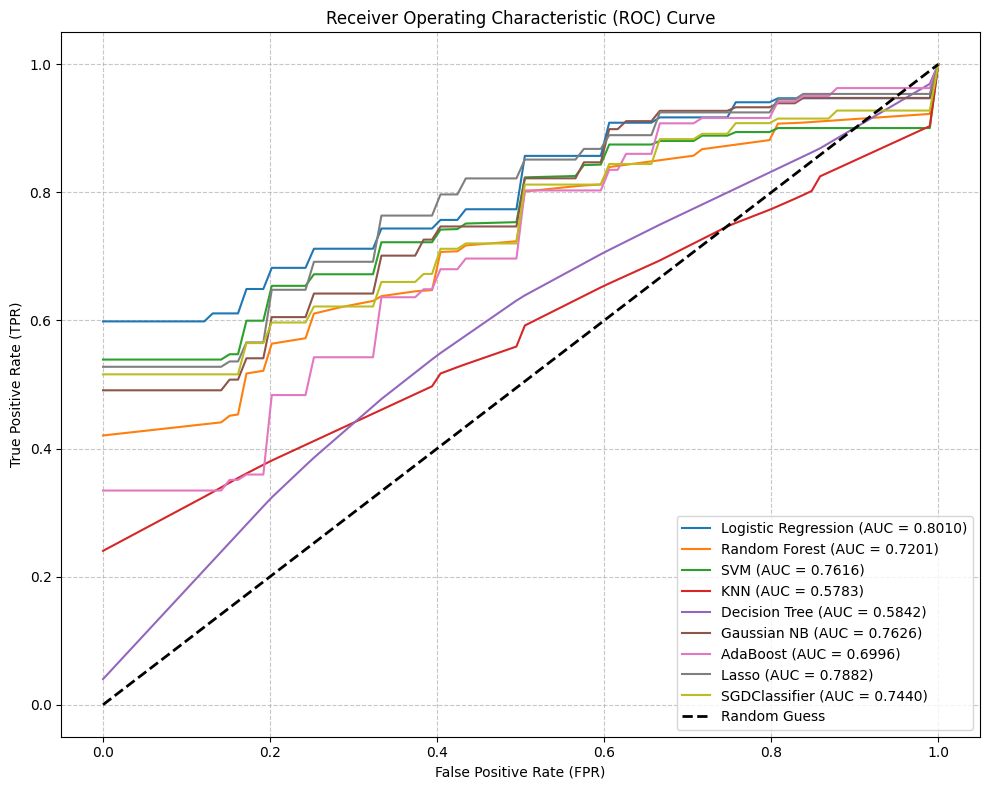

In [30]:
# Plotting ROC Curves for each model
plt.figure(figsize=(10, 8))
for model_name, (all_fpr, all_tpr) in model_roc_curves.items():
    mean_fpr = np.linspace(0, 1, 100)
    mean_tpr = np.zeros_like(mean_fpr)

    # Average TPR values for each unique FPR point
    for fpr, tpr in zip(all_fpr, all_tpr):
        mean_tpr += np.interp(mean_fpr, fpr, tpr)
    mean_tpr /= len(all_fpr)

    plt.plot(mean_fpr, mean_tpr, label=f"{model_name} (AUC = {model_auc_scores[model_name][0]:.4f})")

# Adding a diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 3.2 Comparasion between different penalty, folds, and parameter

In [31]:
from sklearn.model_selection import StratifiedKFold

penalties = ['l1', 'l2']
C_values = [0.01, 0.1, 1.0]
n_folds_options = [2, 5, 10, 20]
results = []

for n_folds in n_folds_options:
    folds = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)
    
    for penalty in penalties:
        for C in C_values:
            model_params = {'penalty': penalty, 'C': C, 'solver': 'liblinear', 'class_weight': 'balanced', 'max_iter': 10000}
            lr_model = LogisticRegression(**model_params)
            
            auc_scores = []
            for train_index, val_index in folds.split(X_train_scaled, y):
                X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
                y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]
                lr_model.fit(X_train_fold, y_train_fold)
                y_val_pred_prob = lr_model.predict_proba(X_val_fold)[:, 1]
                auc_scores.append(roc_auc_score(y_val_fold, y_val_pred_prob))
            
            mean_score = np.mean(auc_scores)
            result = {
                'n_folds': n_folds,
                'penalty': penalty,
                'C': C,
                'mean_roc_auc_score': mean_score
            }
            results.append(result)
            
            print(f"Processed: folds={n_folds}, penalty={penalty}, C={C}, Mean ROC AUC: {mean_score:.4f}")
# ***RESULT IN REPORT***

Processed: folds=2, penalty=l1, C=0.01, Mean ROC AUC: 0.5000
Processed: folds=2, penalty=l1, C=0.1, Mean ROC AUC: 0.7181
Processed: folds=2, penalty=l1, C=1.0, Mean ROC AUC: 0.7243
Processed: folds=2, penalty=l2, C=0.01, Mean ROC AUC: 0.7147
Processed: folds=2, penalty=l2, C=0.1, Mean ROC AUC: 0.7056
Processed: folds=2, penalty=l2, C=1.0, Mean ROC AUC: 0.7011
Processed: folds=5, penalty=l1, C=0.01, Mean ROC AUC: 0.5000
Processed: folds=5, penalty=l1, C=0.1, Mean ROC AUC: 0.7736
Processed: folds=5, penalty=l1, C=1.0, Mean ROC AUC: 0.7997
Processed: folds=5, penalty=l2, C=0.01, Mean ROC AUC: 0.7976
Processed: folds=5, penalty=l2, C=0.1, Mean ROC AUC: 0.7854
Processed: folds=5, penalty=l2, C=1.0, Mean ROC AUC: 0.7681
Processed: folds=10, penalty=l1, C=0.01, Mean ROC AUC: 0.5000
Processed: folds=10, penalty=l1, C=0.1, Mean ROC AUC: 0.8049
Processed: folds=10, penalty=l1, C=1.0, Mean ROC AUC: 0.7819
Processed: folds=10, penalty=l2, C=0.01, Mean ROC AUC: 0.7694
Processed: folds=10, penalty=l

# 4. Basic Modeling Performance - whole training dataset

## 4.1 Basic Modelling

In [32]:
from mlxtend.classifier import StackingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression, Lasso, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# all_classifiers = [
#     LogisticRegression(C=0.1, penalty='l2', random_state=42, max_iter=1000),
#     RandomForestClassifier(n_estimators=100, random_state=42),
#     GradientBoostingClassifier(n_estimators=100, random_state=42),
#     SVC(C=1.0, kernel='rbf', random_state=42, probability=True),
#     KNeighborsClassifier(n_neighbors=5),
#     DecisionTreeClassifier(random_state=42),
#     GaussianNB(),
#     AdaBoostClassifier(n_estimators=100, random_state=42),
#     Lasso(alpha=0.1, random_state=42),
#     SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
# ]
models = {
    'Logistic Regression': LogisticRegression(C=0.1, penalty='l2', random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(C=1.0, kernel='rbf', random_state=42, probability=True),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gaussian NB': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
    'Lasso': Lasso(alpha=0.1, random_state=42),
    'SGDClassifier': SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
}

In [33]:

param_grids = {
    'Logistic Regression': {
        'class_weight': ['balanced'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1','l2'],
        'max_iter': [1000, 2000],
        'solver': ['liblinear']
    },
    'Random Forest': {
        'n_estimators': [100, 1000],
        'max_depth': [None, 3, 5, 15],
    },
    'SVM': {
        'C': [0.001, 0.01, 0.1, 1, 10],
        'kernel': ['rbf', 'linear', 'poly'],
        'gamma': ['scale', 'auto'],
    },
    'KNN': {
        'n_neighbors': [2, 3, 5, 7, 9, 10, 20],
        'weights': ['uniform', 'distance'],
        'leaf_size': [5, 10, 30]
    },
    'Decision Tree': {
        'criterion':['gini', 'entropy', 'log_loss'],
        'class_weight':['balanced'],
        'max_depth': [None, 5, 10, 20, 30, 50, 60, 100],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf':[2,3,5,10],
        'min_impurity_decrease':[0.1,0.2,0.5]
    },
    'Gaussian NB': {},
    'AdaBoost': {
        'n_estimators': [5, 10, 50, 100, 200],
        'learning_rate': [0.001, 0.01, 0.1, 0.5, 1, 1.5, 10],
    },
    'Lasso': {
        'alpha': [0.01, 0.1, 1, 10],
        'tol': [0.00025, 0.0005, 0.001, 0.002]
    },
    'SGDClassifier': {
        'alpha': [0.0001, 0.001, 0.01, 0.1],
        'loss': ['hinge', 'log', 'modified_huber'],
        'penalty': ['l1', 'l2', 'elasticnet'],
        'l1_ratio': [0, 0.15, 0.5, 1.0],
        'learning_rate': ['optimal', 'invscaling', 'adaptive'],
        'max_iter': [1000, 2000]
    }
}

In [34]:
train = pd.read_csv('/kaggle/input/dont-overfit-i/train.csv')
test = pd.read_csv('/kaggle/input/dont-overfit-i/test.csv')

y=train['target']
X=train.drop(["id", "target"], axis=1)
test = test.drop(["id"], axis=1)

X_train = X
X_test = test
y_train = y

scaler = StandardScaler()
X_train_basic = scaler.fit_transform(X_train)
X_test_basic = scaler.transform(X_test)

X_train_basic.shape, X_test_basic.shape, y_train.shape

((250, 300), (19750, 300), (250,))

### GridSearchCV

In [35]:
import warnings
warnings.filterwarnings('ignore')

In [36]:
# Store the best models and parameters
best_models = {}
basic_predictions = {}

for model_name, model in models.items():
    print(f"Performing GridSearchCV for {model_name}...")
    
    # Create GridSearchCV only if parameter grid is specified
    if param_grids.get(model_name):
        grid_search = GridSearchCV(estimator=model,
                                   param_grid=param_grids[model_name],
                                   scoring='roc_auc',
                                   cv=20,
                                   n_jobs=-1,
                                   verbose=1)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
        best_score = grid_search.best_score_
        
        print(f"Best parameters for {model_name}: {best_params} with best score: {best_score}")
    else:
        # No parameter grid specified (e.g., Gaussian NB)
        best_model = model
        best_model.fit(X_train_basic, y_train)
    
    # Store the best model for later predictions
    best_models[model_name] = best_model

    # Make predictions using the best model
    y_test_pred = best_model.predict(X_test_basic)
    basic_predictions[model_name] = y_test_pred

    print(f"Training complete for {model_name}.\n")

# ***RESULT IN FOLLOWING CELL***

Performing GridSearchCV for Logistic Regression...
Fitting 20 folds for each of 24 candidates, totalling 480 fits
Best parameters for Logistic Regression: {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'} with best score: 0.815625
Training complete for Logistic Regression.

Performing GridSearchCV for Random Forest...
Fitting 20 folds for each of 8 candidates, totalling 160 fits
Best parameters for Random Forest: {'max_depth': 3, 'n_estimators': 1000} with best score: 0.755625
Training complete for Random Forest.

Performing GridSearchCV for SVM...
Fitting 20 folds for each of 30 candidates, totalling 600 fits
Best parameters for SVM: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'} with best score: 0.7715624999999999
Training complete for SVM.

Performing GridSearchCV for KNN...
Fitting 20 folds for each of 42 candidates, totalling 840 fits
Best parameters for KNN: {'leaf_size': 5, 'n_neighbors': 10, 'weights': 'distance'} with best score

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/skle

Best parameters for SGDClassifier: {'alpha': 0.01, 'l1_ratio': 0.5, 'learning_rate': 'optimal', 'loss': 'log', 'max_iter': 1000, 'penalty': 'elasticnet'} with best score: 0.8178124999999999
Training complete for SGDClassifier.



### Final model after GridSearchCV

In [37]:
final_models = {
    'Logistic Regression': LogisticRegression(C=0.1, penalty='l1', solver='liblinear', class_weight='balanced', max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=1000, max_depth=3, random_state=42),
    'SVM': SVC(C=0.1, kernel='linear', gamma='scale', random_state=42, probability=True),
    'KNN': KNeighborsClassifier(n_neighbors=10, weights='distance', leaf_size=5),
    'Decision Tree': DecisionTreeClassifier(criterion='entropy', class_weight='balanced', max_depth=None, min_impurity_decrease=0.1, min_samples_leaf=2, min_samples_split=2, random_state=42),
    'Gaussian NB': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(n_estimators=200, learning_rate=1.5, random_state=42),
    'Lasso': Lasso(alpha=0.1, tol=0.00025, random_state=42),
    'SGDClassifier': SGDClassifier(alpha=0.01, l1_ratio=0.5, learning_rate='optimal', loss='log', max_iter=1000, penalty='elasticnet', random_state=42)
}

In [38]:
basic_predictions = {}

for model_name, pipeline in final_models.items():
    print(f"Training {model_name} on the entire dataset...")
    pipeline.fit(X_train, y_train)
    y_test_pred = pipeline.predict(X_test)
    if model_name == "Lasso":
        y_test_pred = np.where(y_test_pred >= 0.5, 1, 0)
    basic_predictions[model_name] = y_test_pred
    # Convert predictions to DataFrame
    submission_df = pd.DataFrame({
        'id': submission['id'],
        'target': y_test_pred
    })
    file_name = f"submission_basic_{model_name}.csv"

    # Save DataFrame to CSV
    submission_df.to_csv(file_name, index=False)
    print(f"Saved predictions for {model_name} with basic model to {file_name}")

Training Logistic Regression on the entire dataset...
Saved predictions for Logistic Regression with basic model to submission_basic_Logistic Regression.csv
Training Random Forest on the entire dataset...
Saved predictions for Random Forest with basic model to submission_basic_Random Forest.csv
Training SVM on the entire dataset...
Saved predictions for SVM with basic model to submission_basic_SVM.csv
Training KNN on the entire dataset...
Saved predictions for KNN with basic model to submission_basic_KNN.csv
Training Decision Tree on the entire dataset...
Saved predictions for Decision Tree with basic model to submission_basic_Decision Tree.csv
Training Gaussian NB on the entire dataset...
Saved predictions for Gaussian NB with basic model to submission_basic_Gaussian NB.csv
Training AdaBoost on the entire dataset...
Saved predictions for AdaBoost with basic model to submission_basic_AdaBoost.csv
Training Lasso on the entire dataset...
Saved predictions for Lasso with basic model to su

In [39]:
basic_pred_df = pd.DataFrame(basic_predictions)
basic_pred_df['id'] = submission['id']
basic_pred_df.head()

,Logistic Regression,Random Forest,SVM,KNN,Decision Tree,Gaussian NB,AdaBoost,Lasso,SGDClassifier,id
0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1,1.0,250
1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1,1.0,251
2,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1,1.0,252
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1.0,253
4,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1,1.0,254


result: LR 0.753
RF 0.500
SVM 0.629
KNN 0.546
DT 0.619
GNB 0.591
AB 0.619
Lasso 0.528
SGDC 0.589

## 4.2 Improved Models: feature creation, selection

In [40]:
train = pd.read_csv('/kaggle/input/dont-overfit-i/train.csv')
test = pd.read_csv('/kaggle/input/dont-overfit-i/test.csv')

y=train['target']
X=train.drop(["id", "target"], axis=1)
test = test.drop(["id"], axis=1)

X_train = X
X_test = test
y_train = y

X_train['300'] = X_train.std(1)
X_test['300'] = X_test.std(1)
X_train['301'] = X_train.mean(1)
X_test['301'] = X_test.mean(1)

## 4.2.1 balance by SMOTE

In [41]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority', n_jobs=-1)
X_sm, y_sm = smote.fit_resample(X_train, y_train)

In [42]:
scaler = StandardScaler()
X_train_final = scaler.fit_transform(X_train)
X_test_final = scaler.transform(X_test)

X_train_final.shape, X_test_final.shape, y_train.shape

((250, 302), (19750, 302), (250,))

## 4.2.2 feature selection by ELI5, SelectKBest, VarianceThreshold, RFE, PCA

In [43]:
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.feature_selection import VarianceThreshold, RFE, SelectKBest, f_classif

In [44]:
# Feature selection using SelectKBest
select_kbest = SelectKBest(score_func=f_classif, k=10)  # select the 10 most important features based on ANOVA F-value.
X_train_kbest = select_kbest.fit_transform(X_train_final, y_train)
X_test_kbest = select_kbest.transform(X_test_final)

# Feature selection using Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFE
rfe_selector = RFE(estimator=LogisticRegression(max_iter=1000, random_state=42), n_features_to_select=10)
X_train_rfe = rfe_selector.fit_transform(X_train_final, y_train)
X_test_rfe = rfe_selector.transform(X_test_final)

# Fit the eli5.PermutationImportance
perm_model = LogisticRegression(max_iter=1000, random_state=42).fit(X_train_final, y_train)
perm_importance = PermutationImportance(perm_model, random_state=42, cv=5).fit(X_train_final, y_train)
importances = perm_importance.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
top_10_indices = sorted_indices[:10]
X_train_eli5 = X_train_final[:, top_10_indices]
X_test_eli5 = X_test_final[:, top_10_indices]

X_train_kbest.shape, X_test_kbest.shape,X_train_rfe.shape, X_test_rfe.shape, X_train_eli5.shape, X_test_eli5.shape

((250, 10), (19750, 10), (250, 10), (19750, 10), (250, 10), (19750, 10))

In [45]:
kf = KFold(n_splits=20, shuffle=True, random_state=42)

# Store AUC scores for plotting
model_auc_scores = {}
feature_selection_methods = {
    'KBEST':(X_train_kbest, X_test_kbest),
    'RFE': (X_train_rfe, X_test_rfe),
    'ELI5':(X_train_eli5, X_test_eli5)
}

In [46]:
improved_predictions = {}
for feature_name, (X_train, X_test) in feature_selection_methods.items():
    print(f"Evaluating feature selection method: {feature_name}")
    improved_predictions[feature_name] = {}
    for model_name, pipeline in final_models.items():
        print(f"Training {model_name} on the entire dataset...")
        pipeline.fit(X_train, y_train)
        y_test_pred = pipeline.predict(X_test)
        if model_name == "Lasso":
            y_test_pred = np.where(y_test_pred >= 0.5, 1, 0)
        improved_predictions[feature_name][model_name] = y_test_pred
        # Convert predictions to DataFrame
        submission_df = pd.DataFrame({
            'id': submission['id'],
            'target': y_test_pred
        })
        file_name = f"submission_{feature_name}_{model_name}.csv"

        # Save DataFrame to CSV
        submission_df.to_csv(file_name, index=False)
        print(f"Saved predictions for {model_name} with {feature_name} to {file_name}")

Evaluating feature selection method: KBEST
Training Logistic Regression on the entire dataset...
Saved predictions for Logistic Regression with KBEST to submission_KBEST_Logistic Regression.csv
Training Random Forest on the entire dataset...
Saved predictions for Random Forest with KBEST to submission_KBEST_Random Forest.csv
Training SVM on the entire dataset...
Saved predictions for SVM with KBEST to submission_KBEST_SVM.csv
Training KNN on the entire dataset...
Saved predictions for KNN with KBEST to submission_KBEST_KNN.csv
Training Decision Tree on the entire dataset...
Saved predictions for Decision Tree with KBEST to submission_KBEST_Decision Tree.csv
Training Gaussian NB on the entire dataset...
Saved predictions for Gaussian NB with KBEST to submission_KBEST_Gaussian NB.csv
Training AdaBoost on the entire dataset...
Saved predictions for AdaBoost with KBEST to submission_KBEST_AdaBoost.csv
Training Lasso on the entire dataset...
Saved predictions for Lasso with KBEST to submiss

# 5. Submission & Performance Checking

## 5.1 submission score with basic modelling

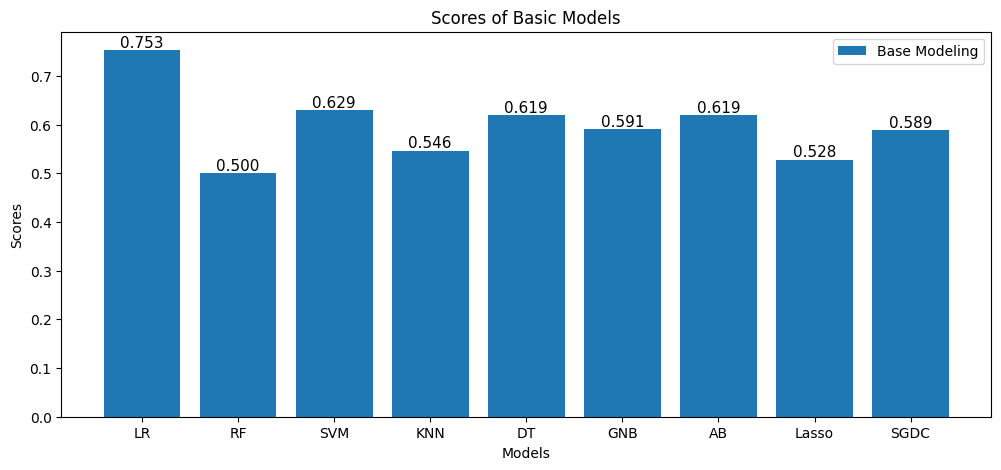

In [47]:
# leaderboard score with basic modelling
scores_base = {}
scores_base['LR'] = 0.753 # logistic regression
scores_base['RF'] = 0.500 # random forest
scores_base['SVM'] = 0.629 
scores_base['KNN'] = 0.546
scores_base['DT'] = 0.619 # Decision Tree
scores_base['GNB'] = 0.591 # Gaussian NB
scores_base['AB'] = 0.619 #AdaBoost
scores_base['Lasso'] =  0.528
scores_base['SGDC'] = 0.589 # SGDClassifier

# print(scores_base)
plt.figure(figsize=(12, 5))
plt.bar(range(len(scores_base)), list(scores_base.values()), label='Base Modeling', align='center')
plt.title('Scores of Basic Models')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.xticks(range(len(scores_base)), list(scores_base.keys()))
for a, b in zip(range(len(scores_base)), list(scores_base.values())):
    plt.text(a, b, '%.3f' % b, ha='center', va='bottom', fontsize=11)

plt.legend()
plt.show()

## 5.2 submission with feature selection

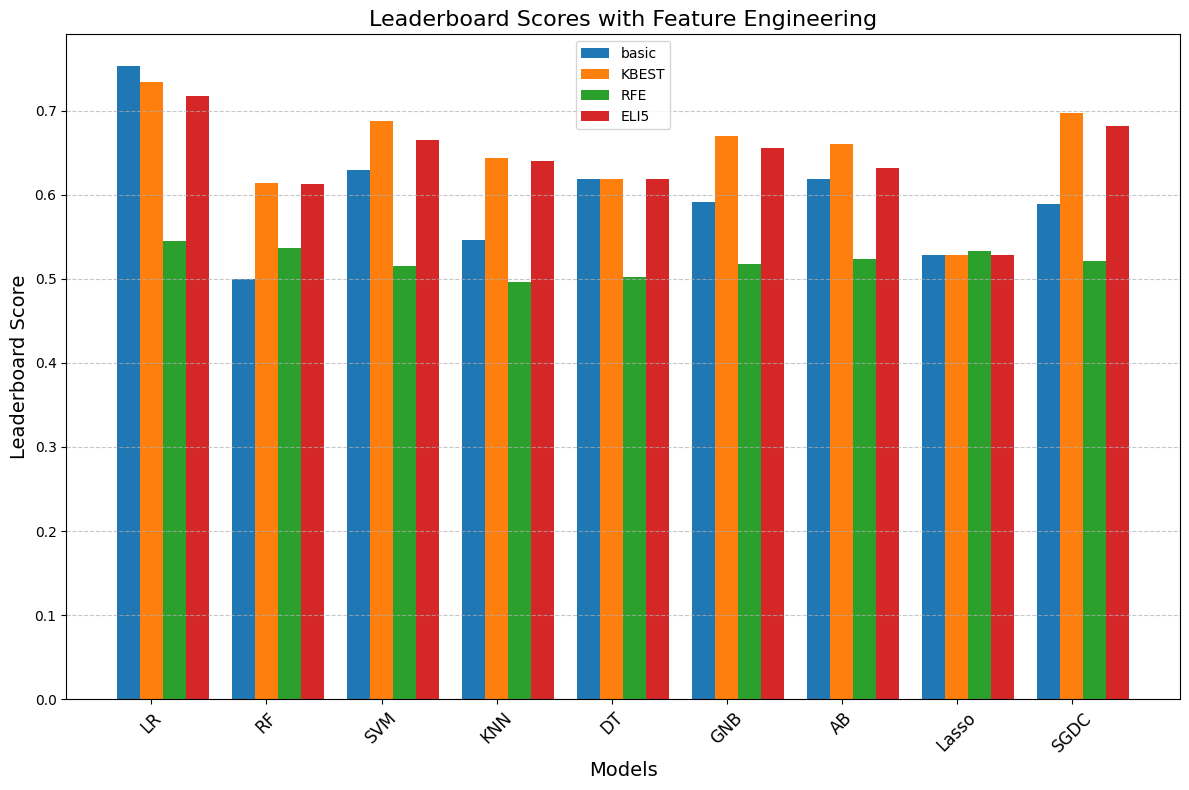

In [48]:
# leaderboard score with feature engineering
scores_improved = {
    "basic": {'LR': 0.753, 'RF': 0.5, 'SVM': 0.629, 'KNN': 0.546, 'DT': 0.619, 'GNB': 0.591, 'AB': 0.619, 'Lasso': 0.528, 'SGDC': 0.589},
    "KBEST": {'LR': 0.734, 'RF': 0.614, 'SVM': 0.688 , 'KNN': 0.644, 'DT':0.619, 'GNB': 0.670, 'AB': 0.660, 'Lasso': 0.528, 'SGDC': 0.697},
    "RFE": {'LR': 0.545, 'RF': 0.536, 'SVM': 0.515, 'KNN': 0.496, 'DT': 0.502, 'GNB': 0.517, 'AB': 0.524, 'Lasso': 0.533, 'SGDC': 0.521},
    "ELI5": {'LR': 0.717, 'RF': 0.613, 'SVM': 0.665, 'KNN': 0.640, 'DT': 0.619, 'GNB': 0.655, 'AB': 0.632, 'Lasso': 0.528, 'SGDC': 0.682}
}

# Plotting parameters
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.2
index = np.arange(len(scores_improved["basic"]))

# Plotting histograms for each feature engineering method
for i, (feature_name, scores) in enumerate(scores_improved.items()):
    plt.bar(index + i * bar_width, scores.values(), bar_width, label=feature_name)

# Setting labels and title
plt.xlabel('Models', fontsize=14)
plt.ylabel('Leaderboard Score', fontsize=14)
plt.title('Leaderboard Scores with Feature Engineering', fontsize=16)
plt.xticks(index + bar_width, scores_improved["basic"].keys(), fontsize=12, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()